<img align="center" style="max-width: 1000px" src="https://github.com/HSG-AIML-Teaching/GSERM2024-Lab/blob/main/assignment/banner.png?raw=1">

<img align="right" style="max-width: 200px; height: auto" src="https://github.com/HSG-AIML-Teaching/GSERM2024-Lab/blob/main/assignment/hsg_logo.png?raw=1">

##  Assignment - Fashion MNIST Convolutional Neural Networks (CNNs)

GSERM'24 course "Deep Learning: Fundamentals and Applications", University of St. Gallen

This week we have learned how to enhance vanilla Artificial Neural Networks (ANNs) using `PyTorch` to classify even more complex images. For this purpose, we used a special type of deep neural network referred to **Convolutional Neural Networks (CNNs)**. In our exam exercise, we aim to leverage that knowledge by applying it to the known Fashion-MNIST dataset.

As always, pls. don't hesitate to post your potential questions on CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email: aiml-teaching.ics@unisg.ch).

## 1. Assignment Objectives:

As discussed in our last session, these are the tasks for the exam exercise:

> 1. Load the Fashion **MNIST dataset**.
> 2. Implement a **CNN** architecture able to work with this data.
> 3. **Train** the model, evaluate its **performance** and visualize the results.
> 4. Try to **improve** the performance of the initial model.
> 5. **Document** the results in the form of PowerPoint slides.

But before we do so let's start (as always) with a motivational video by NVIDIA. Happy coding!

In [1]:
from IPython.display import YouTubeVideo
# Official Intro | GTC 2020 | I AM AI"
# YouTubeVideo('e2_hsjpTi4w', width=800, height=500)

## 2. Setup of the Jupyter Notebook Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. We will mostly use the `PyTorch`, `Numpy`, `Sklearn`, `Matplotlib`, `Seaborn` and a few utility libraries throughout this lab:

In [2]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

Import Python machine / deep learning libraries:

In [3]:
# import the PyTorch deep learning library
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

Import the sklearn classification metrics:

In [4]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Import Python plotting libraries:

In [5]:
# import matplotlib, seaborn, and PIL data visualization libary
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Enable notebook matplotlib inline plotting:

In [6]:
%matplotlib inline

Import Google's GDrive connector and mount your GDrive directories:

Create a structure of Colab Notebook sub-directories inside of GDrive to store (1) the data as well as (2) the trained neural network models:

In [7]:
# create Colab Notebooks directory
notebook_directory = './Colab_Notebooks'
if not os.path.exists(notebook_directory): os.makedirs(notebook_directory)

 # create data sub-directory inside the Colab Notebooks directory
data_directory = './Colab_Notebooks/Data'
if not os.path.exists(data_directory): os.makedirs(data_directory)

 # create models sub-directory inside the Colab Notebooks directory
models_directory = './Colab_Notebooks/models'
if not os.path.exists(models_directory): os.makedirs(models_directory)


Set a random `seed` value to obtain reproducable results:

In [8]:
# init deterministic seed
seed_value = 1234
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU

In [9]:
# set cpu or gpu enabled device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu').type

# init deterministic GPU seed
torch.cuda.manual_seed(seed_value)

# log type of device enabled
print('[LOG] notebook with {} computation enabled'.format(str(device)))
import torch; print(torch.version.cuda)

[LOG] notebook with cuda computation enabled
12.1


In [10]:
!nvidia-smi

Fri Jul  5 22:58:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.55                 Driver Version: 552.55         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A500 Laptop GPU   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   60C    P8              4W /   30W |     163MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 3. Exam Exercise: Convolutional Neural Networks (CNNs)

The **Fashion-MNIST database** is a large database of Zalando articles that is commonly used for training various image processing systems. The database is widely used for training and testing in the field of machine learning. Source: https://www.kaggle.com/c/insar-fashion-mnist-challenge

### 3.1 Fashion-MNIST Dataset Download and Data Assessment

In [11]:
# To solve this task you might want to have a look at the code of exercise 4.

#### Step 1. define "train" path ###############################################

# ***************************************************
train_path = data_directory + "/FMNIST_train"
# ***************************************************

In [12]:
#### Step 2. define transformations and download the "train" dataset ############

# ***************************************************
transformation = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

fmnist_train_data = torchvision.datasets.FashionMNIST(root=train_path, train=True, transform=transformation, download=True)
# ***************************************************

In [13]:
#### Step 3. setup/define labels ################################################

# ***************************************************
data_labels = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}
# ***************************************************

In [14]:
#### Step 4. define "eval" path ################################################

# ***************************************************
eval_path = data_directory + "/FMNIST_eval"
# ***************************************************

In [15]:
#### Step 5. define transformation and download the "eval" dataset #############
# ***************************************************
fmnist_eval_data = torchvision.datasets.FashionMNIST(root=eval_path, train=False, transform=transformation, download=True)
# ***************************************************

### 3.2 Convolutional Neural Network (CNN) Model Training and Evaluation

<img align="center" style="max-width: 900px" src="https://github.com/HSG-AIML/LabAI-Coding/blob/main/resources/lab_05/classification.png?raw=1">

Please note this image of a CNN was defined for the CIFAR-10 dataset. Your Fashion-MNIST images have a different size.


**1. Implement and train your "baseline" CNN.**

In [16]:
# To solve this task you might want to have a look at the code of exercise 5.
# Please note: the Fashion MNIST dataset only encompasses two dimensions per image (1 channel).

#### Step 1. define and init neural network architecture #############################################################
##As a baseline model let´s copy the structure of LeNet
# ***************************************************
class joachimnet(nn.Module):

    def __init__(self):

        super(joachimnet, self).__init__()

        #convolution 1-2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)     
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        #fully connected 1-2-3
        self.linear1 = nn.Linear(16 * 4 * 4, 120, bias=True)
        self.relu1 = nn.ReLU(inplace=True)
        self.linear2 = nn.Linear(120, 84, bias=True)
        self.relu2 = nn.ReLU(inplace=True)

        #Linear layer 
        self.linear3 = nn.Linear(84, 10)

        #Softmax
        self.logsoftmax = nn.LogSoftmax(dim=1)
        #FFWD
    def forward(self, images):

        #Conv layers pass
        x = self.pool1(self.relu1(self.conv1(images)))
        x = self.pool2(self.relu2(self.conv2(x)))

        #flatten x
        x = x.view(-1,16*4*4)
        #Fully connected passing
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        # apllying Softmax
        x = self.logsoftmax(self.linear3(x))

        return x
# ***************************************************

In [17]:
#### Step 2. define loss, training hyperparameters and dataloader ####################################################

# ***************************************************
#First we push model to device
model = joachimnet()
model = model.to(device)
!nvidia-smi
num_params = 0
for param in model.parameters():
    num_params += param.numel()
print('[LOG] Number of to be trained FMNIST model parameters: {}.'.format(num_params))

nll_loss = nn.NLLLoss()
nll_loss = nll_loss.to(device)
learning_rate = 0.001
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)
num_epochs = 20
mini_batch_size = 128
fmnist_train_dataloader = torch.utils.data.DataLoader(fmnist_train_data, batch_size=mini_batch_size, shuffle=True)
# ***************************************************

Fri Jul  5 22:58:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.55                 Driver Version: 552.55         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A500 Laptop GPU   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   60C    P0              4W /   30W |     231MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
#### Step 3. run model training ######################################################################################

# ***************************************************
train_epoch_losses = []
model.train()

for epoch in range(num_epochs):
    train_mini_batch_losses = []
    for i, (images, labels) in enumerate(fmnist_train_dataloader):
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)
        model.zero_grad()
        loss = nll_loss(output,labels)
        loss.backward()
        optimizer.step()
        train_mini_batch_losses.append(loss.data.item())
    train_epoch_loss = np.mean(train_mini_batch_losses)

    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))
    model_name = 'fmnistepoch_{}.pth'.format(str(epoch))
    torch.save(model.state_dict(), os.path.join(models_directory+"/",model_name)) #Note there may be an error due to local storage, iferror del +"/"
    train_epoch_losses.append(train_epoch_loss)

# ***************************************************

C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\865244118.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")


[LOG 20240705-20:59:01] epoch: 0 train-loss: 2.304310346717265
[LOG 20240705-20:59:08] epoch: 1 train-loss: 2.30336637080097
[LOG 20240705-20:59:13] epoch: 2 train-loss: 2.302497993400102
[LOG 20240705-20:59:19] epoch: 3 train-loss: 2.301686227957069
[LOG 20240705-20:59:25] epoch: 4 train-loss: 2.300870612231907
[LOG 20240705-20:59:31] epoch: 5 train-loss: 2.3000607673547417
[LOG 20240705-20:59:37] epoch: 6 train-loss: 2.299210349634004
[LOG 20240705-20:59:45] epoch: 7 train-loss: 2.29825834119752
[LOG 20240705-20:59:52] epoch: 8 train-loss: 2.297186245542091
[LOG 20240705-20:59:59] epoch: 9 train-loss: 2.2959199027974466
[LOG 20240705-21:00:06] epoch: 10 train-loss: 2.2942984739600467
[LOG 20240705-21:00:14] epoch: 11 train-loss: 2.292188395315142
[LOG 20240705-21:00:20] epoch: 12 train-loss: 2.2894527673212957
[LOG 20240705-21:00:27] epoch: 13 train-loss: 2.285782771324044
[LOG 20240705-21:00:36] epoch: 14 train-loss: 2.2805694013770457
[LOG 20240705-21:00:43] epoch: 15 train-loss: 2

In [19]:
print("Model with the lowest loss is fmnistepoch_{}.pth".format(np.argmin(train_epoch_losses)))

Model with the lowest loss is fmnistepoch_19.pth


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\2671935103.py:7: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("[Train-loss $\mathcal{L}^{NLL}$]", fontsize=10)


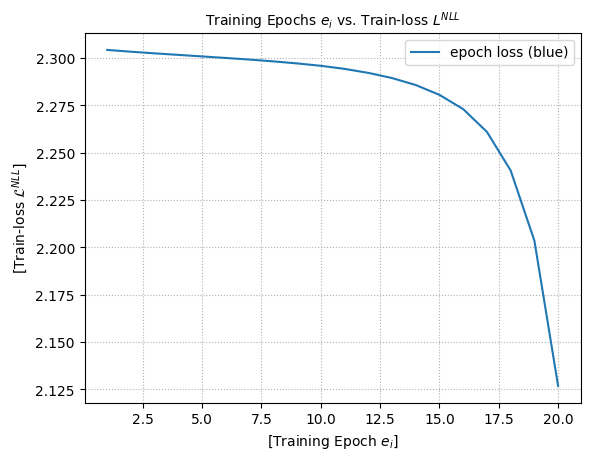

In [20]:
##Plot of train_loss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle='dotted')
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')
ax.set_xlabel("[Training Epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Train-loss $\mathcal{L}^{NLL}$]", fontsize=10)
plt.legend(loc="upper right", numpoints=1, fancybox=True)
plt.title('Training Epochs $e_i$ vs. Train-loss $L^{NLL}$', fontsize=10);

BENCHMARK TO BEAT: 2.063697576522827
The model accuracy is: 0.3697


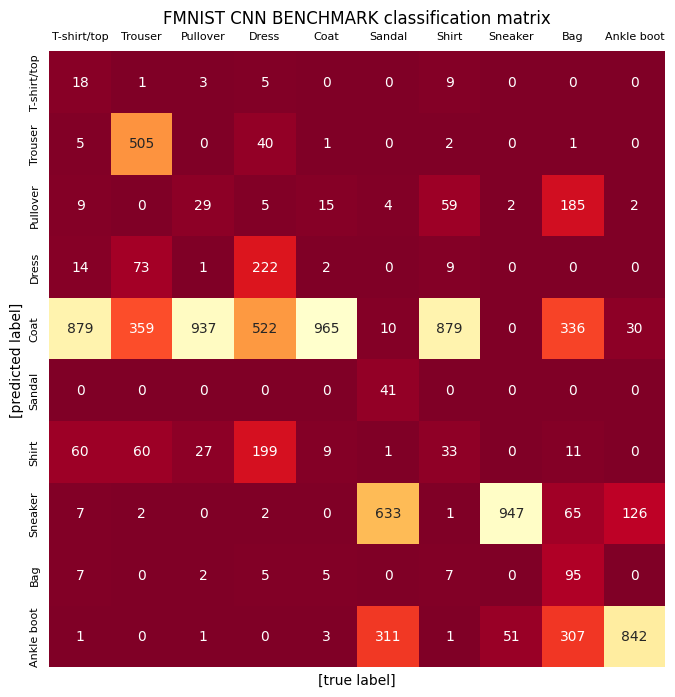

In [21]:
#### Step 4. run model evaluation ####################################################################################

# ***************************************************
#You can download evaluation model from my Github, in case something will not work correctly or you do not want to spend so much time training this model
#just to check my assignment :)

evaluation_model = "https://github.com/Miseag/Fashion-MNIST-project/blob/main/fmnistepoch_19.pth?raw=TRUE"
model_bytes = urllib.request.urlopen(evaluation_model)
model_buffer = io.BytesIO(model_bytes.read())
eval_model = joachimnet()
eval_model.load_state_dict(torch.load(model_buffer, map_location=torch.device('cpu')))


###Setting model to evaluation mode and defining dataloader
eval_model.eval()
fmnist_eval_dataloader = torch.utils.data.DataLoader(fmnist_eval_data, batch_size=10000, shuffle=False)

###Calculating loss that I have to beat with updates to this CNN
eval_mini_batch_losses = []

for i, (images, labels) in enumerate(fmnist_eval_dataloader):

    output = eval_model(images)
    loss = nll_loss(output, labels)
    eval_mini_batch_losses.append(loss.data.item())

eval_loss = np.mean(eval_mini_batch_losses)
print("BENCHMARK TO BEAT: {}".format(str(eval_loss)))
benchmark = eval_loss
# ***************************************************
#Confusion matrix
fmnist_classes = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}
predictions = torch.argmax(eval_model(next(iter(fmnist_eval_dataloader))[0]), dim=1)
print("The model accuracy is:",metrics.accuracy_score(fmnist_eval_data.targets, predictions.detach()))
mat = confusion_matrix(fmnist_eval_data.targets, predictions.detach())

plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fmnist_classes.values(), yticklabels=fmnist_classes.values())
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)
plt.title('FMNIST CNN BENCHMARK classification matrix')
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

**2. Implement and train your "improved" CNN.**
("Improved" simply refers to a better classification accuracy than your baseline model)

### First we just change the parameters, in the next run, we will change also network architecture
### First thing that comes to mind is setting epoch parameters to higher number, since the training loss does not converge at 20 epochs yet
###  Also increase learning rate a bit, so the training loss will be able to converge faster(We will see from the results, if the rate is not too high)

In [22]:
#### To solve this task you might want to have a look at the code of exercise 5.
# Some ideas might be the addition of layers, addition neurons or convolutions, longer training, smaller learning rate etc.
#If we take a look at confusion matrix, the matrix should be beaten easily

#### Step 1. define and init neural network architecture #############################################################

# ***************************************************
#same as before
# ***************************************************

#### Step 2. define loss, training hyperparameters and dataloader ####################################################

# ***************************************************
model2 = joachimnet()
model2 = model2.to(device)
!nvidia-smi
nll_loss = nn.NLLLoss()
nll_loss = nll_loss.to(device)
learning_rate = 0.003 #Increased learning rate
optimizer = optim.SGD(params=model2.parameters(), lr=learning_rate)
num_epochs = 100 #5 times more learning epochs
mini_batch_size = 128
fmnist_train_dataloader = torch.utils.data.DataLoader(fmnist_train_data, batch_size=mini_batch_size, shuffle=True)
# ***************************************************

#### Step 3. run model training ######################################################################################

# ***************************************************
train_epoch_losses = []
model2.train()

for epoch in range(num_epochs):
    train_mini_batch_losses = []
    for i, (images, labels) in enumerate(fmnist_train_dataloader):
        images = images.to(device)
        labels = labels.to(device)
        output = model2(images)
        model2.zero_grad()
        loss = nll_loss(output,labels)
        loss.backward()
        optimizer.step()
        train_mini_batch_losses.append(loss.data.item())
    train_epoch_loss = np.mean(train_mini_batch_losses)

    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))
    model_name = 'fmnistepoch2_{}.pth'.format(str(epoch))
    torch.save(model2.state_dict(), os.path.join(models_directory+"/",model_name)) #Note there may be an error due to local storage, iferror del +"/"
    train_epoch_losses.append(train_epoch_loss)
# ***************************************************

Fri Jul  5 23:01:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.55                 Driver Version: 552.55         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A500 Laptop GPU   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   63C    P8              4W /   30W |     345MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\3558394134.py:45: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")


[LOG 20240705-21:01:22] epoch: 0 train-loss: 2.3016690526689803
[LOG 20240705-21:01:29] epoch: 1 train-loss: 2.2976414338866276
[LOG 20240705-21:01:36] epoch: 2 train-loss: 2.290375736476516
[LOG 20240705-21:01:43] epoch: 3 train-loss: 2.272526851340906
[LOG 20240705-21:01:50] epoch: 4 train-loss: 2.2001059334923716
[LOG 20240705-21:01:57] epoch: 5 train-loss: 1.7101153178509874
[LOG 20240705-21:02:03] epoch: 6 train-loss: 1.1070015862552343
[LOG 20240705-21:02:10] epoch: 7 train-loss: 0.9598842330578802
[LOG 20240705-21:02:16] epoch: 8 train-loss: 0.8974655248971382
[LOG 20240705-21:02:23] epoch: 9 train-loss: 0.8485900538562458
[LOG 20240705-21:02:30] epoch: 10 train-loss: 0.8127804720071333
[LOG 20240705-21:02:36] epoch: 11 train-loss: 0.7797463121953041
[LOG 20240705-21:02:44] epoch: 12 train-loss: 0.7564198082444001
[LOG 20240705-21:02:51] epoch: 13 train-loss: 0.7370312931949395
[LOG 20240705-21:02:57] epoch: 14 train-loss: 0.7161448294801245
[LOG 20240705-21:03:04] epoch: 15 tra

In [23]:
print("Model with the lowest loss is fmnistepoch2_{}.pth".format(np.argmin(train_epoch_losses)))

Model with the lowest loss is fmnistepoch2_99.pth


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\2671935103.py:7: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("[Train-loss $\mathcal{L}^{NLL}$]", fontsize=10)


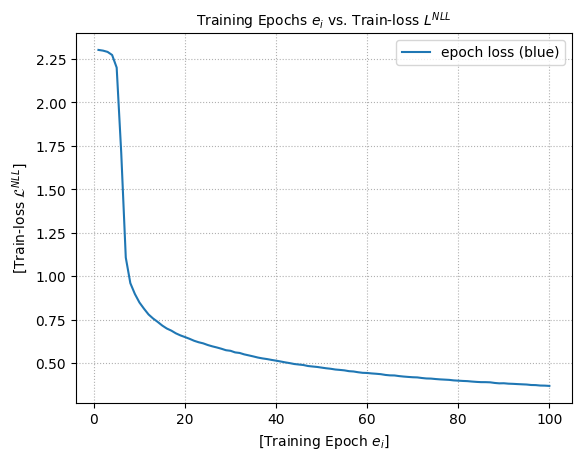

In [24]:
##Plot of train_loss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle='dotted')
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')
ax.set_xlabel("[Training Epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Train-loss $\mathcal{L}^{NLL}$]", fontsize=10)
plt.legend(loc="upper right", numpoints=1, fancybox=True)
plt.title('Training Epochs $e_i$ vs. Train-loss $L^{NLL}$', fontsize=10);

FIRST ATTEMPT SCORE: 0.32000625133514404
The model accuracy is: 0.8989


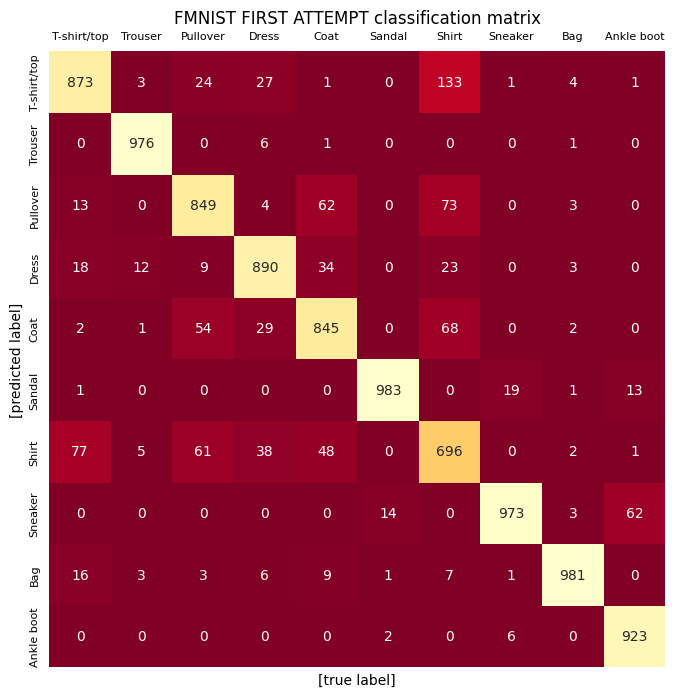

In [35]:
#### Step 4. run model evaluation ####################################################################################

# ***************************************************
evaluation_model2 = "https://github.com/Miseag/Fashion-MNIST-project/blob/main/fmnistepoch2_99.pth?raw=TRUE"
model_bytes2 = urllib.request.urlopen(evaluation_model2)
model_buffer2 = io.BytesIO(model_bytes2.read())
eval_model2 = joachimnet()
eval_model2.load_state_dict(torch.load(model_buffer2, map_location=torch.device('cpu')))

#eval_model=joachimnet()


###Setting model to evaluation mode and defining dataloader
eval_model2.eval()
fmnist_eval_dataloader = torch.utils.data.DataLoader(fmnist_eval_data, batch_size=10000, shuffle=False)

###Calculating loss that I have to beat with updates to this CNN
eval_mini_batch_losses = []

for i, (images, labels) in enumerate(fmnist_eval_dataloader):

    output = eval_model2(images)
    loss = nll_loss(output, labels)
    eval_mini_batch_losses.append(loss.data.item())

eval_loss = np.mean(eval_mini_batch_losses)
print("FIRST ATTEMPT SCORE: {}".format(str(eval_loss)))
# ***************************************************
#Confusion matrix
predictions = torch.argmax(eval_model2(next(iter(fmnist_eval_dataloader))[0]), dim=1)
print("The model accuracy is:",metrics.accuracy_score(fmnist_eval_data.targets, predictions.detach()))
mat = confusion_matrix(fmnist_eval_data.targets, predictions.detach())

plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fmnist_classes.values(), yticklabels=fmnist_classes.values())
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)
plt.title('FMNIST FIRST ATTEMPT classification matrix')
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

plt.savefig('confusion_matrix.png')
# ***************************************************

### Maybe I can run it again with more epochs and observe better results,also lets add more layers to the architecture
I added 2 conv layers and normalization layers after each layer, i changed learning rate back to 0.001 as it seems more safe and we will observe the development


In [26]:
# To solve this task you might want to have a look at the code of exercise 5.
# Please note: the Fashion MNIST dataset only encompasses two dimensions per image (1 channel).

#### Step 1. define and init neural network architecture #############################################################
##As a baseline model let´s copy the structure of LeNet, but with only 1 in_channels since our images are 1x28x28
# ***************************************************
class olivernet(nn.Module):
    def __init__(self):
        super(olivernet, self).__init__()

        # convolution 1-2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=2, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(3)

        self.conv2 = nn.Conv2d(in_channels=3, out_channels=13, kernel_size=2, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(13)

        self.conv3 = nn.Conv2d(in_channels=13, out_channels=23, kernel_size=2, stride=1, padding=0)
        self.bn3 = nn.BatchNorm2d(23)

        self.conv4 = nn.Conv2d(in_channels=23, out_channels=33, kernel_size=2, stride=1, padding=0)
        self.bn4 = nn.BatchNorm2d(33)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) 

        # fully connected 1-2-3
        self.linear1 = nn.Linear(33 * 12 * 12, 240, bias=True)  # Update this size according to the output size before flattening
        self.bn5 = nn.BatchNorm1d(240)
        self.relu1 = nn.ReLU(inplace=True)

        self.linear2 = nn.Linear(240, 120, bias=True)
        self.bn6 = nn.BatchNorm1d(120)
        self.relu2 = nn.ReLU(inplace=True)

        self.linear3 = nn.Linear(120, 60, bias=True)
        self.bn7 = nn.BatchNorm1d(60)
        self.relu3 = nn.ReLU(inplace=True)

        self.linear4 = nn.Linear(60, 30, bias=True)
        self.bn8 = nn.BatchNorm1d(30)
        self.relu4 = nn.ReLU(inplace=True)

        # Linear layer 
        self.linear5 = nn.Linear(30, 10)

        # Softmax
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, images):
        # Conv layers pass
        x = self.bn1(self.relu1(self.conv1(images)))
        x = self.bn2(self.relu2(self.conv2(x)))
        x = self.bn3(self.relu3(self.conv3(x)))
        x = self.pool3(self.bn4(self.relu4(self.conv4(x))))

        # flatten x
        x = x.view(-1, 33 * 12 * 12)  # Correct flattened size

        # Fully connected passing
        x = self.relu1(self.bn5(self.linear1(x)))
        x = self.relu2(self.bn6(self.linear2(x)))
        x = self.relu3(self.bn7(self.linear3(x)))
        x = self.relu4(self.bn8(self.linear4(x)))

        # Applying Softmax
        x = self.logsoftmax(self.linear5(x))

        return x

# ***************************************************

In [27]:
#### Step 2. define loss, training hyperparameters and dataloader ####################################################

# ***************************************************
#First we push model to device
model = olivernet()
model = model.to(device)
!nvidia-smi
num_params = 0
for param in model.parameters():
    num_params += param.numel()
print('[LOG] Number of to be trained FMNIST model parameters: {}.'.format(num_params))

nll_loss = nn.NLLLoss()
nll_loss = nll_loss.to(device)
learning_rate = 0.003
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)
num_epochs = 100
mini_batch_size = 128
fmnist_train_dataloader = torch.utils.data.DataLoader(fmnist_train_data, batch_size=mini_batch_size, shuffle=True)
# ***************************************************

Fri Jul  5 23:12:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.55                 Driver Version: 552.55         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A500 Laptop GPU   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   64C    P8              4W /   20W |     362MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [28]:
#### Step 3. run model training ######################################################################################

# ***************************************************
train_epoch_losses = []
model.train()

for epoch in range(num_epochs):
    train_mini_batch_losses = []
    for i, (images, labels) in enumerate(fmnist_train_dataloader):
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)
        model.zero_grad()
        loss = nll_loss(output,labels)
        loss.backward()
        optimizer.step()
        train_mini_batch_losses.append(loss.data.item())
    train_epoch_loss = np.mean(train_mini_batch_losses)

    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))
    model_name = 'finalfmnistepoch_{}.pth'.format(str(epoch))
    torch.save(model.state_dict(), os.path.join(models_directory+"/",model_name)) #Note there may be an error due to local storage, iferror del +"/"
    train_epoch_losses.append(train_epoch_loss)

# ***************************************************

C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\3893530190.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")


[LOG 20240705-21:13:01] epoch: 0 train-loss: 1.2646847795575922
[LOG 20240705-21:13:13] epoch: 1 train-loss: 0.7679533110752798
[LOG 20240705-21:13:26] epoch: 2 train-loss: 0.55098503427719
[LOG 20240705-21:13:39] epoch: 3 train-loss: 0.4287984062359531
[LOG 20240705-21:13:52] epoch: 4 train-loss: 0.3541717134368445
[LOG 20240705-21:14:05] epoch: 5 train-loss: 0.30210862802798305
[LOG 20240705-21:14:18] epoch: 6 train-loss: 0.26365087767526796
[LOG 20240705-21:14:31] epoch: 7 train-loss: 0.23053672093191127
[LOG 20240705-21:14:43] epoch: 8 train-loss: 0.20596123111845333
[LOG 20240705-21:14:55] epoch: 9 train-loss: 0.1812726340250674
[LOG 20240705-21:15:07] epoch: 10 train-loss: 0.16053085736056635
[LOG 20240705-21:15:22] epoch: 11 train-loss: 0.14084835665058226
[LOG 20240705-21:15:34] epoch: 12 train-loss: 0.1237338117715011
[LOG 20240705-21:15:47] epoch: 13 train-loss: 0.10829205196231667
[LOG 20240705-21:16:01] epoch: 14 train-loss: 0.09529325486754557
[LOG 20240705-21:16:15] epoch

In [29]:
print("Model with the lowest loss is fmnistepoch_{}.pth".format(np.argmin(train_epoch_losses)))

Model with the lowest loss is fmnistepoch_99.pth


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_17924\2671935103.py:7: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("[Train-loss $\mathcal{L}^{NLL}$]", fontsize=10)


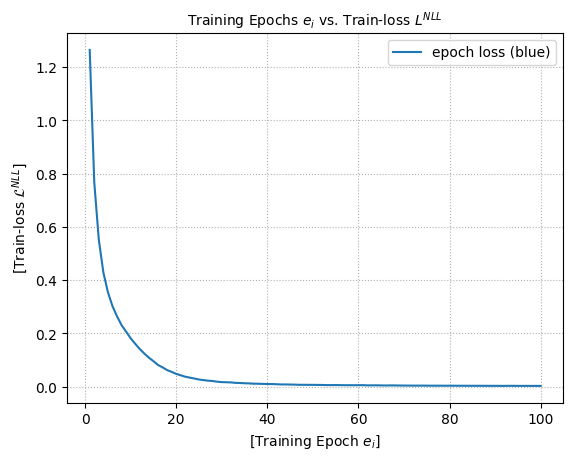

In [30]:
##Plot of train_loss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle='dotted')
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')
ax.set_xlabel("[Training Epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Train-loss $\mathcal{L}^{NLL}$]", fontsize=10)
plt.legend(loc="upper right", numpoints=1, fancybox=True)
plt.title('Training Epochs $e_i$ vs. Train-loss $L^{NLL}$', fontsize=10);

The model accuracy is: 0.9131


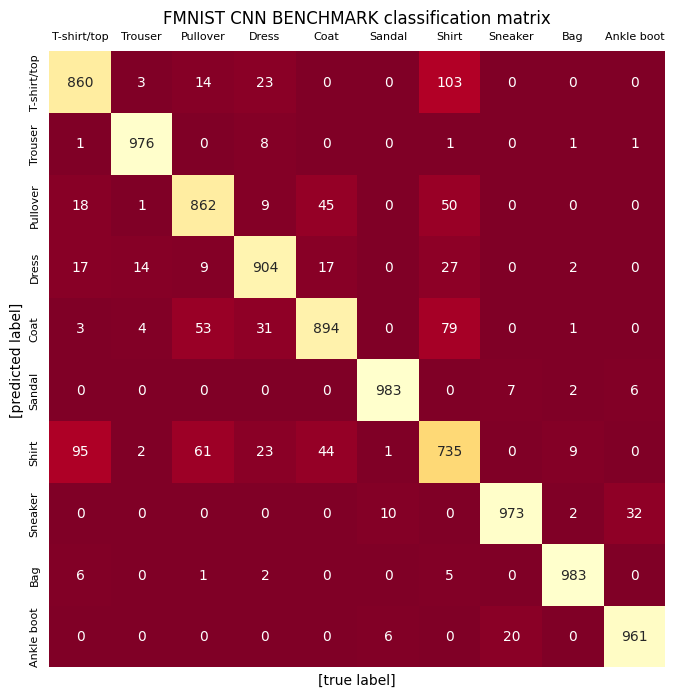

In [36]:
#### Step 4. run model evaluation ####################################################################################

# ***************************************************
#You can download evaluation model from my Github, in case something will not work correctly

evaluation_model = "https://github.com/Miseag/Fashion-MNIST-project/blob/main/finalfmnistepoch_99.pth?raw=TRUE"
model_bytes = urllib.request.urlopen(evaluation_model)
model_buffer = io.BytesIO(model_bytes.read())
eval_model = olivernet()
eval_model.load_state_dict(torch.load(model_buffer, map_location=torch.device('cpu')))

#eval_model=joachimnet()


###Setting model to evaluation mode and defining dataloader
eval_model.eval()
fmnist_eval_dataloader = torch.utils.data.DataLoader(fmnist_eval_data, batch_size=10000, shuffle=False)

###Calculating loss that I have to beat with updates to this CNN
eval_mini_batch_losses = []

for i, (images, labels) in enumerate(fmnist_eval_dataloader):

    output = eval_model(images)
    loss = nll_loss(output, labels)
    eval_mini_batch_losses.append(loss.data.item())

eval_loss = np.mean(eval_mini_batch_losses)

# ***************************************************
#Confusion matrix
fmnist_classes = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}
predictions = torch.argmax(eval_model(next(iter(fmnist_eval_dataloader))[0]), dim=1)
print("The model accuracy is:",metrics.accuracy_score(fmnist_eval_data.targets, predictions.detach()))
mat = confusion_matrix(fmnist_eval_data.targets, predictions.detach())

plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fmnist_classes.values(), yticklabels=fmnist_classes.values())
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)
plt.title('FMNIST CNN BENCHMARK classification matrix')
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');
plt.savefig('confusion_matrix2.png')

## Improvement has been reached !!!
If I would take a look at the models individually I can see some of those performing a bit better during training, but I was trying to pretend that I cannot know the results and use only 1 model.